In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Bidirectional, GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [ ]:
result_df = pd.read_csv("./Windowed Data.csv")
result_df = result_df.drop(labels=["Unnamed: 0"],axis=1)

In [ ]:
result_df

,Time,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Total.Num.Packets,Total.bytes.of.Packets
0,03:03:25,321673,378953,176001042,688917718,700626,864918760
1,03:03:30,71333,86846,9552175,184810368,158179,194362543
2,03:03:35,49026,65682,2439004,142056259,114708,144495263
3,03:03:40,29460,39111,3986939,59917713,68571,63904652
4,03:03:45,27611,31320,4254925,34013794,58931,38268719
...,...,...,...,...,...,...,...
689,11:40:54,78,52,6499,50290,130,56789
690,11:41:00,73,51,7804,34860,124,42664
691,11:41:06,5862,4162,4156420,1072047,10024,5228467
692,11:41:12,1569,596,1863989,418451,2165,2282440


In [ ]:
type(result_df["Time"][0])

str

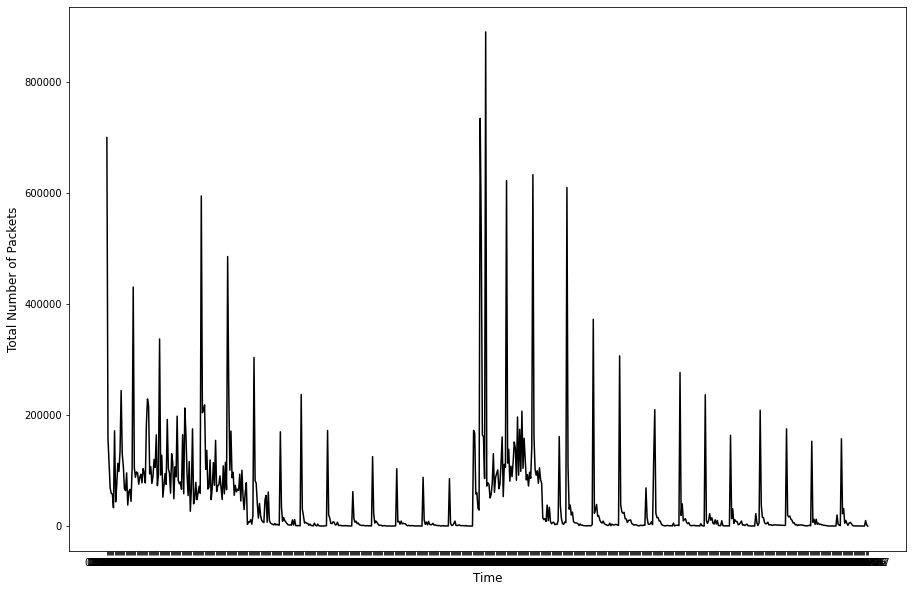

In [ ]:
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (15,10))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel(y_label, {'fontsize': 12})
    #plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
timeseries(result_df["Time"].astype("str"), result_df['Total.Num.Packets'], 'Time','Total Number of Packets')

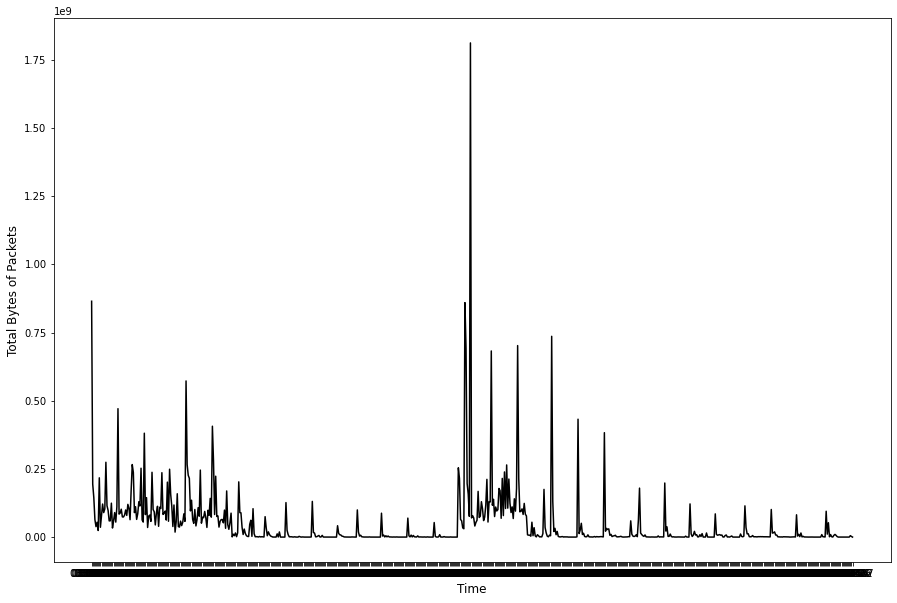

In [ ]:
timeseries(result_df["Time"].astype("str"), result_df['Total.bytes.of.Packets'], 'Time','Total Bytes of Packets')

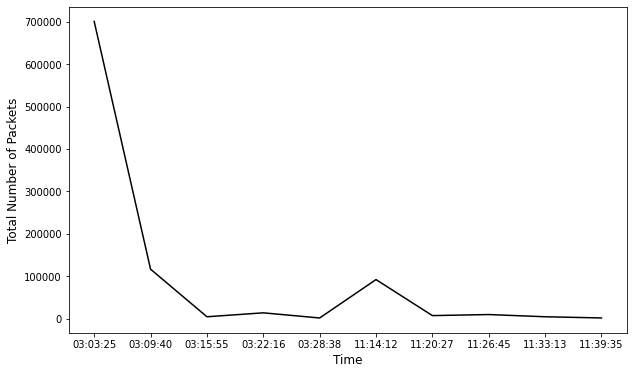

In [ ]:
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    x_list=[]
    y_list=[]
    for i in range(0,len(y_axis),75):
      x_list.append(x_axis[i])
      y_list.append(y_axis[i])
    plt.plot(x_list, y_list, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel(y_label, {'fontsize': 12})
timeseries(result_df["Time"].astype("str"), result_df['Total.Num.Packets'], 'Time','Total Number of Packets')

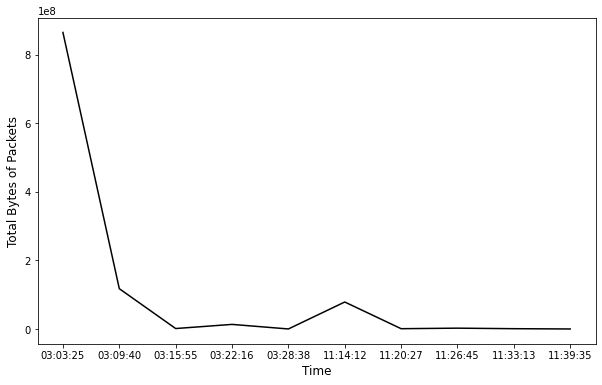

In [ ]:
timeseries(result_df["Time"].astype("str"), result_df['Total.bytes.of.Packets'], 'Time','Total Bytes of Packets')

In [ ]:
train_size = int(len(result_df)*0.8)
train_dataset, test_dataset = result_df.iloc[:train_size],result_df.iloc[train_size:]
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [ ]:
train_dataset.head()

,Time,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Total.Num.Packets,Total.bytes.of.Packets
0,03:03:25,321673,378953,176001042,688917718,700626,864918760
1,03:03:30,71333,86846,9552175,184810368,158179,194362543
2,03:03:35,49026,65682,2439004,142056259,114708,144495263
3,03:03:40,29460,39111,3986939,59917713,68571,63904652
4,03:03:45,27611,31320,4254925,34013794,58931,38268719


In [ ]:
test_dataset.head()

,Time,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Total.Num.Packets,Total.bytes.of.Packets
0,11:29:20,2343,1407,1837286,319237,3750,2156523
1,11:29:25,8579,1472,12291419,511406,10051,12802825
2,11:29:30,563,584,72902,72900,1147,145802
3,11:29:35,416,428,64651,143964,844,208615
4,11:29:41,422,431,103714,125424,853,229138


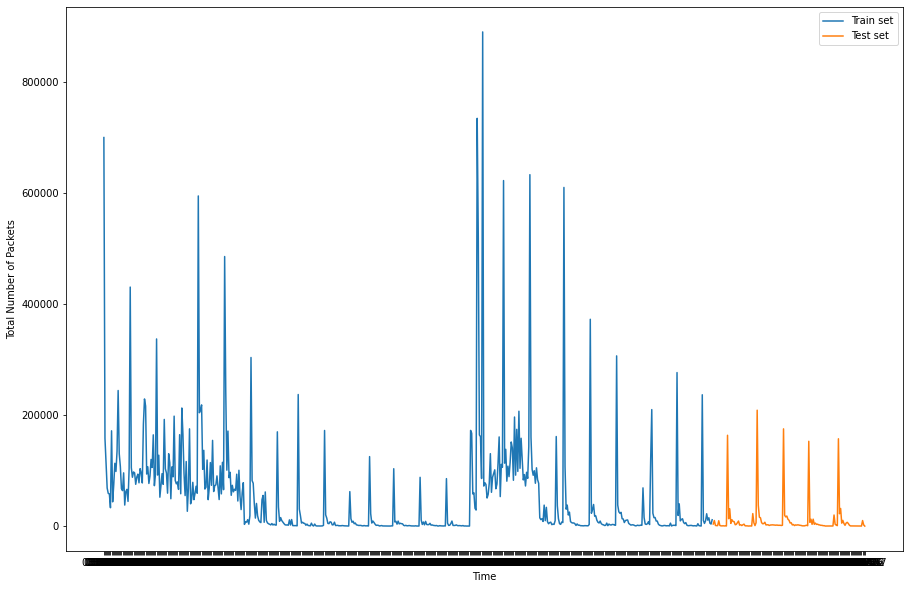

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_dataset["Time"],train_dataset["Total.Num.Packets"])
plt.plot(test_dataset["Time"],test_dataset["Total.Num.Packets"])
plt.xlabel('Time')
plt.ylabel('Total Number of Packets')
plt.legend(['Train set', 'Test set'], loc='upper right')

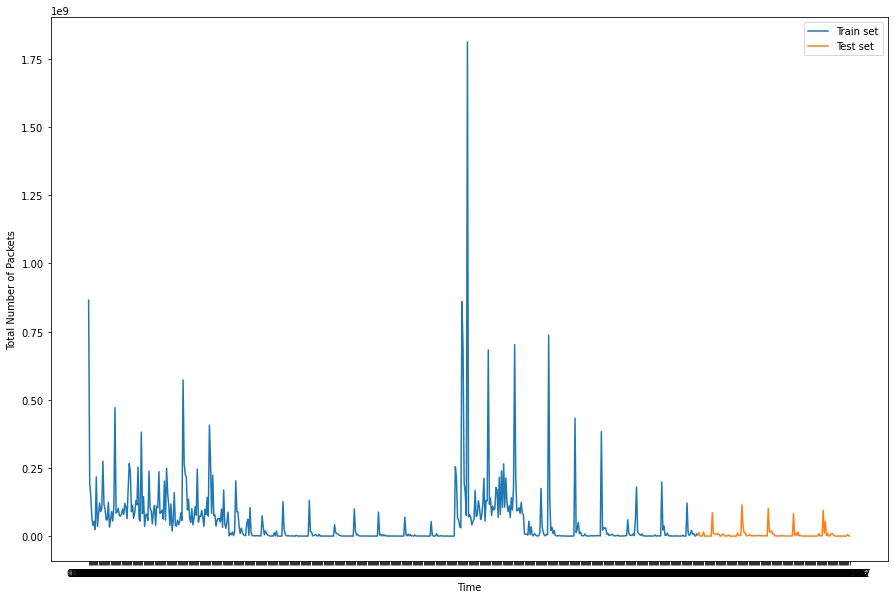

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_dataset["Time"],train_dataset["Total.bytes.of.Packets"])
plt.plot(test_dataset["Time"],test_dataset["Total.bytes.of.Packets"])
plt.xlabel('Time')
plt.ylabel('Total Number of Packets')
plt.legend(['Train set', 'Test set'], loc='upper right')

In [ ]:
X_train = train_dataset[["Total.Fwd.Packets","Total.Backward.Packets"]]
y_train = train_dataset["Total.Num.Packets"]
X_test = test_dataset[["Total.Fwd.Packets","Total.Backward.Packets"]]
y_test = test_dataset["Total.Num.Packets"]

In [ ]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)

output_scaler = scaler_y.fit(y_train.values.reshape(-1,1))
# Apply the scaler to training data
train_x_norm = input_scaler.transform(X_train)
train_y_norm = output_scaler.transform(y_train.values.reshape(-1,1))
# Apply the scaler to test data

test_x_norm = input_scaler.transform(X_test)
test_y_norm = output_scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
X_train[0:30]

,Total.Fwd.Packets,Total.Backward.Packets
0,321673,378953
1,71333,86846
2,49026,65682
3,29460,39111
4,27611,31320
5,26364,31688
6,15644,17490
7,81070,90771
8,19720,23998
9,33812,41075


In [ ]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30

X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
y_train = y_train.reshape(-1,1)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)

X_train.shape:  (525, 30, 2)
y_train.shape:  (525, 1)


In [ ]:
X_test, y_test = create_dataset(test_x_norm, test_y_norm,TIME_STEPS)
y_test = y_test.reshape(-1,1)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_test.shape:  (109, 30, 2)
y_test.shape:  (109, 1)


In [ ]:
X_train.shape[1]

30

In [ ]:
from tensorflow import keras

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# BiLSTM
model_bilstm = create_model_bilstm(64)
# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
14/14 [==============================] - 5s 90ms/step - loss: 0.0134 - val_loss: 0.0034
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0109 - val_loss: 0.0034
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0033
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 9/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0102 - val_loss: 0.0033
Epoch 10/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0102 - val_loss: 0.0032

14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 12/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 13/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0034
Epoch 14/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0034
Epoch 15/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0034
Epoch 16/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 17/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 18/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0033
Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.0033
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 21/100


14/14 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0035
Epoch 36/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.0035
Epoch 37/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.0035
Epoch 38/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0035


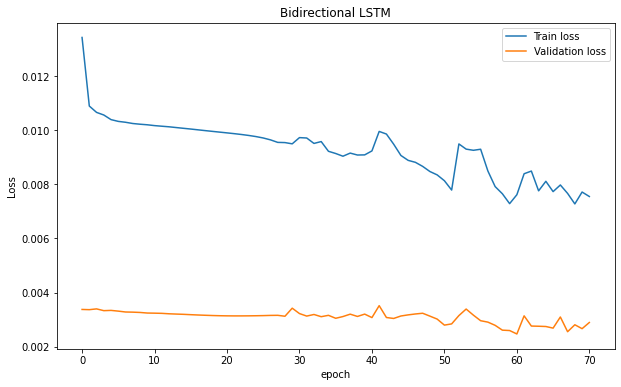

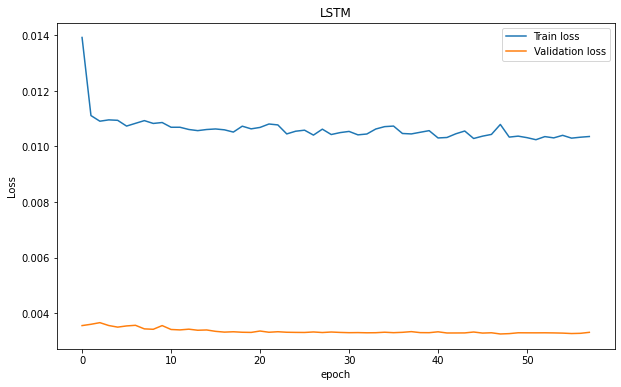

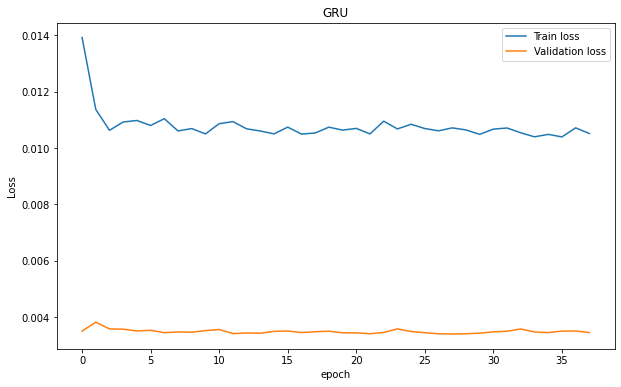

In [ ]:
def plot_loss (history,title=""):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.title(title)
plot_loss (history_bilstm,"Bidirectional LSTM")
plot_loss (history_lstm,"LSTM")
plot_loss (history_gru,"GRU")

In [ ]:
# y_test = scaler_y.inverse_transform(y_test)
# y_train = scaler_y.inverse_transform(y_train)

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    #prediction = scaler_y.inverse_transform(prediction)
    return prediction

In [ ]:
prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

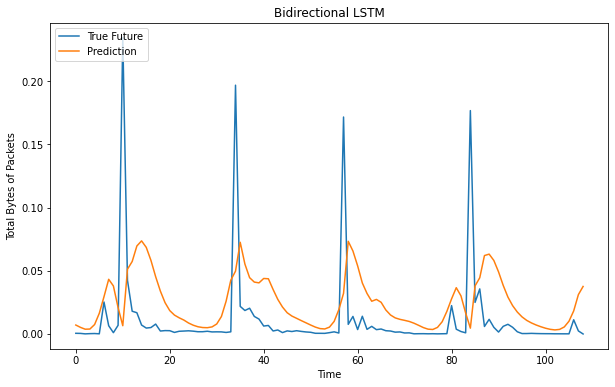

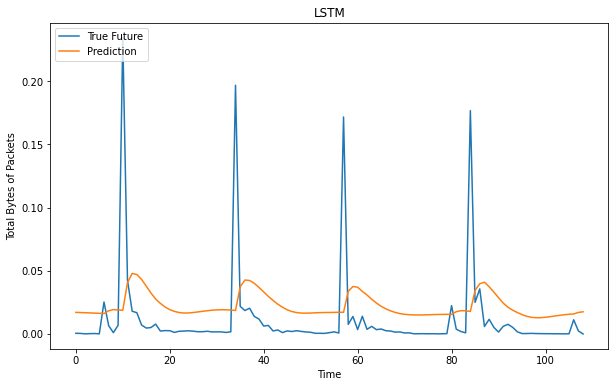

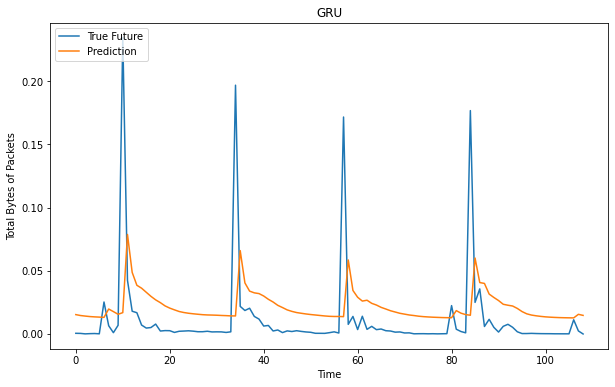

In [ ]:
# Plot true future vs prediction
def plot_future(prediction, y_test,title=""):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel('Total Bytes of Packets')
    plt.title(title)
plot_future(prediction_bilstm, y_test,"Bidirectional LSTM")
plot_future(prediction_lstm, y_test,"LSTM")
plot_future(prediction_gru, y_test,"GRU")

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 0.0251
Root Mean Square Error: 0.0420

LSTM:
Mean Absolute Error: 0.0234
Root Mean Square Error: 0.0388

GRU:
Mean Absolute Error: 0.0230
Root Mean Square Error: 0.0392

